In [1]:
import math
import pandas as pd
# import altair as alt
# from altair import *
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler       
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV     
from sklearn.pipeline import make_pipeline     

from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

from sklearn.model_selection import KFold

from statsmodels.tools import eval_measures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold

# alt.renderers.enable('notebook')
combined = pd.read_csv("combined.csv")
combined = combined.drop(combined.columns[0], axis = 1)

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

/Users/wenjuc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (225,230,291) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
combined

,COUNTY,FIPS_Combined,GEO.display-label,GEO.id,GEO.id2,HC01_VC03,HC01_VC04,HC01_VC06,HC01_VC07,HC01_VC08,...,HC04_VC80,HC04_VC86,HC04_VC87,HC04_VC88,HC04_VC89,HC04_VC90,HC04_VC91,State,TotalDrugReportsCounty,YYYY
0,ADAIR,21001,"Adair County, Kentucky",0500000US21001,21001,7272,5004,1945,4124,1506,...,5.6,2.5,2.7,2.1,1.4,2.0,2.1,KY,176,2010
1,ALLEN,21003,"Allen County, Kentucky",0500000US21003,21003,7811,5526,2363,4011,1519,...,3.7,2.1,2.8,2.2,1.3,1.3,1.2,KY,672,2010
2,ANDERSON,21005,"Anderson County, Kentucky",0500000US21005,21005,8319,6148,2771,4848,1891,...,3.6,1.6,3.0,2.5,1.4,1.8,1.6,KY,490,2010
3,BALLARD,21007,"Ballard County, Kentucky",0500000US21007,21007,3363,2408,1001,2001,725,...,3.4,1.9,3.5,3.1,1.5,1.4,1.7,KY,24,2010
4,BARREN,21009,"Barren County, Kentucky",0500000US21009,21009,16727,11722,4825,9189,3586,...,2.3,1.5,1.7,1.4,0.9,1.1,1.0,KY,3447,2010
5,BATH,21011,"Bath County, Kentucky",0500000US21011,21011,4338,3088,1396,2426,872,...,4.3,3.1,4.1,3.3,1.8,2.0,1.8,KY,405,2010
6,BELL,21013,"Bell County, Kentucky",0500000US21013,21013,10902,7575,2900,5268,1724,...,4.1,2.1,2.7,1.9,1.1,1.1,1.2,KY,4644,2010
7,BOONE,21015,"Boone County, Kentucky",0500000US21015,21015,41612,30519,15658,24522,11987,...,1.3,0.7,1.2,1.2,0.7,1.0,0.8,KY,2691,2010
8,BOURBON,21017,"Bourbon County, Kentucky",0500000US21017,21017,8132,5548,2508,3916,1689,...,3.3,1.6,3.1,2.5,1.4,1.9,1.3,KY,805,2010
9,BOYD,21019,"Boyd County, Kentucky",0500000US21019,21019,19542,13036,5080,9728,3224,...,2.1,1.2,1.5,1.5,0.9,1.0,0.8,KY,4032,2010


In [3]:
combined = combined.drop(['GEO.display-label', 'GEO.id'], axis=1)

In [4]:
combined = combined.rename(columns = {'GEO.id2':'id2'})

In [5]:
list(combined)

['COUNTY',
 'FIPS_Combined',
 'id2',
 'HC01_VC03',
 'HC01_VC04',
 'HC01_VC06',
 'HC01_VC07',
 'HC01_VC08',
 'HC01_VC09',
 'HC01_VC10',
 'HC01_VC11',
 'HC01_VC119',
 'HC01_VC12',
 'HC01_VC120',
 'HC01_VC121',
 'HC01_VC122',
 'HC01_VC123',
 'HC01_VC124',
 'HC01_VC13',
 'HC01_VC130',
 'HC01_VC131',
 'HC01_VC132',
 'HC01_VC133',
 'HC01_VC134',
 'HC01_VC14',
 'HC01_VC140',
 'HC01_VC146',
 'HC01_VC150',
 'HC01_VC151',
 'HC01_VC156',
 'HC01_VC160',
 'HC01_VC161',
 'HC01_VC162',
 'HC01_VC166',
 'HC01_VC17',
 'HC01_VC170',
 'HC01_VC171',
 'HC01_VC172',
 'HC01_VC173',
 'HC01_VC174',
 'HC01_VC175',
 'HC01_VC176',
 'HC01_VC177',
 'HC01_VC178',
 'HC01_VC18',
 'HC01_VC185',
 'HC01_VC186',
 'HC01_VC187',
 'HC01_VC188',
 'HC01_VC189',
 'HC01_VC190',
 'HC01_VC191',
 'HC01_VC192',
 'HC01_VC193',
 'HC01_VC194',
 'HC01_VC195',
 'HC01_VC196',
 'HC01_VC197',
 'HC01_VC198',
 'HC01_VC199',
 'HC01_VC200',
 'HC01_VC201',
 'HC01_VC202',
 'HC01_VC203',
 'HC01_VC204',
 'HC01_VC205',
 'HC01_VC206',
 'HC01_VC207',
 

### Dummy the data

In [6]:
combined = pd.get_dummies(combined)

### Separate Training, Development, and Testing DataSet

training, development, testing dataset are 70%, 15%, 15% of original dataset

In [7]:
train_features, test_features, train_outcome, test_outcome = train_test_split(
    combined.drop("TotalDrugReportsCounty", axis = 1),
    combined.TotalDrugReportsCounty,
    test_size=0.30, 
    random_state=20
)

## Modeling

In [8]:
# selector, threshold for feature selection
selecter = SelectPercentile()
threshold = VarianceThreshold(.1)

# number of folds for cross validation
folds = KFold(n_splits=10, shuffle=True, random_state=11)

### Algorithm 1: Random Forest

In [ ]:
rf_scaler = MinMaxScaler()
rf_clf = RandomForestRegressor(n_estimators: 95)
rf_poly = PolynomialFeatures(degree: 2)
rf_pipe = make_pipeline(rf_poly, threshold, selecter, rf_clf)

# specify parameters and distributions to sample from
param_dist = {"randomforestregressor__max_depth": [3, None],
              "randomforestregressor__min_samples_split": sp_randint(2, 11),
              "randomforestregressor__bootstrap": [True, False],
             'polynomialfeatures__degree':sp_randint(1, 3),
             'selectpercentile__percentile':sp_randint(10, 30)}

n_iter_search = 5
rf_rand = RandomizedSearchCV(rf_pipe, param_distributions=param_dist, 
                             n_iter=n_iter_search, scoring="accuracy", cv=folds)

rf_fit = rf_rand.fit(dev_features, dev_outcome)

In [100]:
regr = RandomForestRegressor(max_depth = 14, random_state= 20, n_estimators=70, min_samples_split=3, n_jobs = 10)
# regr = RandomForestRegressor()
rf_fit = regr.fit(train_features, train_outcome)

get the **best param** for training data

In [13]:
# rf_fit.best_params_

**train the data by best params**

In [ ]:
# rf_fit = RandomForestRegressor(n_estimators = 20, )
# rf_train.fit(train_features, train_outcome)

**get feature importance**

In [102]:
rf_importance_lst = list(rf_fit.feature_importances_)

rf_importance_lst = {
    'feature': list(train_features),
    'importance': rf_importance_lst
}
importance_df = pd.DataFrame.from_dict(rf_importance_lst)
importance_df.to_csv('feature_importance_random_forest.csv')

**Test the best score of training**

In [26]:
rf_fit.best_score_

AttributeError: 'RandomForestRegressor' object has no attribute 'best_score_'

**Test the accuracy in test outcomes**

In [101]:
rf_fit.score(test_features, test_outcome) 


0.8675705222176433

**Save prediction in .csv file. In this way, we don't need to spend lots of time in training data**

In [103]:
rf_test_data = test_features.join(test_outcome)
rf_test_data['preds'] = rf_fit.predict(test_features)
rf_test_data['resid'] = rf_test_data['preds'] - rf_test_data['TotalDrugReportsCounty']
rf_test_data.to_csv('rf_pred_result.csv')

In [40]:
rf_test_data.shape

(916, 11226)

In [31]:
outcome_df = pd.read_csv("rf_pred_result.csv")

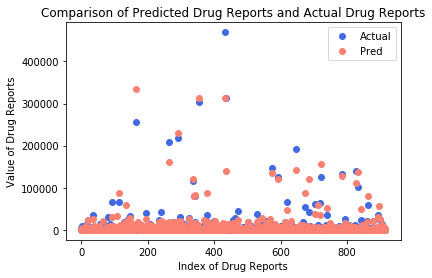

In [161]:
actual = list(rf_test_data['TotalDrugReportsCounty'])
pred = list(rf_test_data['preds'])
plt.plot(actual,'o',label = 'Actual', color = 'royalblue')
plt.plot(pred, 'o', label = 'Pred', color = 'salmon')
plt.legend()
plt.xlabel('Index of Drug Reports')
plt.ylabel('Value of Drug Reports')
plt.title('Comparison of Predicted Drug Reports and Actual Drug Reports')
plt.savefig('predicted_actual.png',bbox_inches='tight')
# plt.show()

In [155]:
max(actual)

469182

In [156]:
[i for i, j in enumerate(actual) if j == max(actual)]

[434]

In [151]:
len(rf_test_data['TotalDrugReportsCounty'])

916

In [153]:
rf_test_data.shape

(916, 11226)

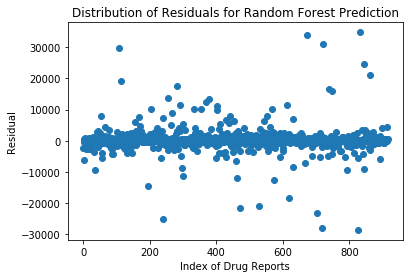

In [180]:
plt.plot(resid_lst_6, 'o')
plt.xlabel('Index of Drug Reports')
plt.ylabel('Residual')
plt.title('Distribution of Residuals for Random Forest Prediction')
plt.savefig('random_forest_resid.png', bbox_inches='tight')

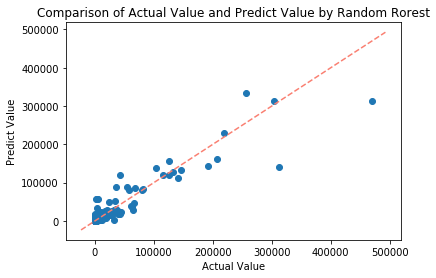

In [197]:
plt.plot(actual, pred, 'o')
plt.xlabel('Actual Value')
plt.ylabel('Predict Value')
plt.title('Comparison of Actual Value and Predict Value by Random Rorest')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 1 * x_vals
plt.plot(x_vals, y_vals, '--', color='salmon')
plt.savefig('rf_predict_actual_com.png', bbox_inches='tight')

### Algorithm 2: Neural Network Models

In [199]:
from sklearn.neural_network import MLPRegressor

In [208]:
mlp_scaler = MinMaxScaler()
mlp_clf = MLPRegressor(solver='lbfgs',alpha=0.00001, hidden_layer_sizes=(5,2), random_state=11)
# mlp_poly = PolynomialFeatures()

# mlp_pipe = make_pipeline(mlp_poly, threshold, mlp_scaler, selecter, mlp_clf)

# # specify parameters and distributions to sample from
# mlp_param_dist = {'polynomialfeatures__degree':sp_randint(1, 3),
#              'selectpercentile__percentile':sp_randint(10, 30)}

# n_iter_search = 5
# mlp_rand = RandomizedSearchCV(mlp_pipe, param_distributions=mlp_param_dist, 
#                              n_iter=n_iter_search, cv=folds)

mlp_fit = mlp_clf.fit(train_features, train_outcome)

In [209]:
mlp_fit.score(test_features, test_outcome) 

0.8423063691128971

**get the best param for training data**

In [ ]:
mlp_fit.best_params_

**get feature importance**

In [ ]:
mlp_importance_lst = list(mlp_fit.coefs_)

mlp_importance_dict = {
    'feature': list(train_features),
    'importance': mlp_importance_lst
}
mlp_importance_df = pd.DataFrame.from_dict(mlp_importance_dict)
mlp_importance_df.to_csv('coeff_mlp.csv', index = None)

**Test the best score of training**

In [ ]:
mlp_fit.best_score_

**Test the accuracy in test outcomes**

In [ ]:
sum(mlp_fit.predict(test_features) == test_outcome) / len(test_outcome)

**Save prediction in .csv file. In this way, we don't need to spend lots of time in training data**

In [ ]:
mlp_test_data = test_features.join(test_outcome)
mlp_test_data['preds'] = mlp_fit.predict(test_features)
mlp_test_data['resid'] = mlp_test_data['preds'] - mlp_test_data['TotalDrugReportsCounty']
mlp_test_data.to_csv('mlp_pred_result.csv')

### Algorithm 3: Lasso

In [210]:
from sklearn import linear_model

In [221]:
ls_scaler = MinMaxScaler()
ls_clf = linear_model.Lasso(alpha=0.09)
ls_poly = PolynomialFeatures()

# ls_pipe = make_pipeline(ls_poly, threshold, mlp_scaler, selecter, ls_clf)

# specify parameters and distributions to sample from
# ls_param_dist = {'polynomialfeatures__degree':sp_randint(1, 3),
#              'selectpercentile__percentile':sp_randint(10, 30)}

# n_iter_search = 5
# ls_rand = RandomizedSearchCV(ls_pipe, param_distributions=ls_param_dist, 
#                              n_iter=n_iter_search, cv=folds)

ls_fit = ls_clf.fit(train_features, train_outcome)

/Users/wenjuc/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [222]:
ls_fit.score(test_features, test_outcome) 

0.87215915429865

In [223]:
from sklearn.ensemble import AdaBoostRegressor

In [228]:
ada_reg = AdaBoostRegressor(learning_rate= 0.2)
ada_fit = ada_reg.fit(train_features, train_outcome)

In [229]:
ada_fit.score(test_features, test_outcome) 

0.8618075258967803

In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [248]:
knn_reg = KNeighborsRegressor(n_neighbors = 4)
# KNeighborsRegressor(n_neighbors=2)
knn_fit = knn_reg.fit(train_features, train_outcome)

In [249]:
knn_fit.score(test_features, test_outcome) 

0.6299272372322746

In [252]:
aglo_dict = {
    'Algorithm': ['Random Forest', 'Lasso', 'Neural Network', 'K Neighbors'],
    'Accuracy': [0.9075705222176433, 0.86215915429865, 0.8423063691128971, 0.6299272372322746]
}
aglo_df = pd.DataFrame.from_dict(aglo_dict)
aglo_df

,Algorithm,Accuracy
0,Random Forest,0.907571
1,Lasso,0.862159
2,Neural Network,0.842306
3,K Neighbors,0.629927


/Users/wenjuc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.
  import sys


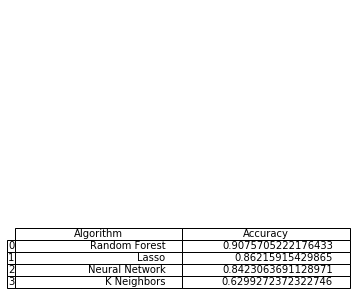

In [253]:
from pandas.tools.plotting import table

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, aglo_df)  # where df is your data frame

plt.savefig('ml_comparison.png')